# missing values
Missing values occurs in dataset when some of the informations is not stored for a variable 
### There are 3 mechanisms

#### 1 Missing Completely at Random, MCAR:
Missing completely at random (MCAR) is a type of missing data mechanism in which the probability of a value being missing is unrelated to both the observed data and the missing data. In other words, if the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing.

For example, in a survey about the prevalence of a certain disease, the missing data might be MCAR if the survey participants with missing values for certain questions were selected randomly and their missing responses are not related to their disease status or any other variables measured in the survey.


#### 2. Missing at Random, MAR:
Missing at Random (MAR) is a type of missing data mechanism in which the probability of a value being missing depends only on the observed data, but not on the missing data itself. In other words, if the data is MAR, the missing values are systematically related to the observed data, but not to the missing data. Here are a few examples of missing at random:

Income data: Suppose you are collecting income data from a group of people, but some participants choose not to report their income. If the decision to report or not report income is related to the participant's age or gender, but not to their income level, then the data is missing at random.

Medical data: Suppose you are collecting medical data on patients, including their blood pressure, but some patients do not report their blood pressure. If the patients who do not report their blood pressure are more likely to be younger or have healthier lifestyles, but the missingness is not related to their actual blood pressure values, then the data is missing at random.

#### 3. Missing data not at random, MNAR
It is a type of missing data mechanism where the probability of missing values depends on the value of the missing data itself. In other words, if the data is MNAR, the missingness is not random and is dependent on unobserved or unmeasured factors that are associated with the missing values.

For example, suppose you are collecting data on the income and job satisfaction of employees in a company. If employees who are less satisfied with their jobs are more likely to refuse to report their income, then the data is not missing at random. In this case, the missingness is dependent on job satisfaction, which is not directly observed or measured.

## handling missing values....
1- by deleting rows.
* this is not good at all

2- by deleting the columns , (axis = 1)
* this is not good at all

3- mean value Imputation
* this tecnique works well when our data is normally distributed

4- median value imputation
* when we have skewed data this works well(because if our data is skewed than definitly we would have outliers , So in case of outliers we should use median)

5- mode value Imputation
* this technique is used for categorical columns

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### checking missing values in dataset

In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

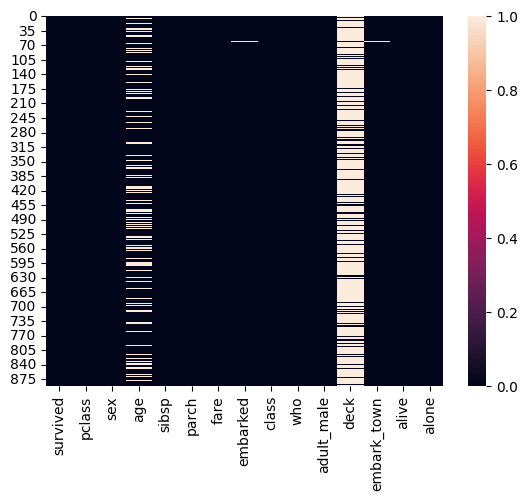

In [5]:
# visualizing missing values
sns.heatmap(df.isnull())
# deck is seat number

In [6]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


#### filling NaN value using mean and median value imputation tecnique
this tecnique works well when our data is normally distributed
(So I will check which of my column is normally distributed)

C:\Users\Estel\AppData\Local\Temp\ipykernel_15616\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

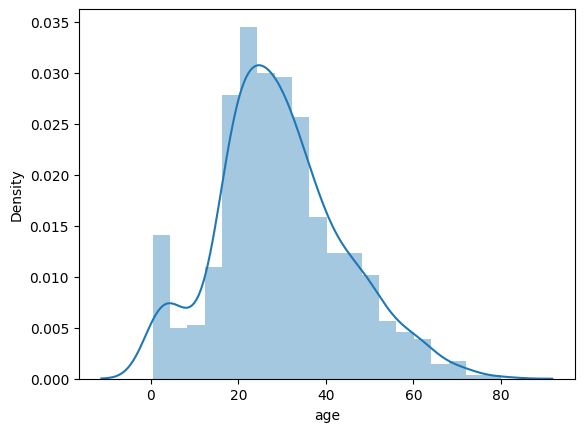

In [7]:
sns.distplot(df['age'])

In [48]:
df[df['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embarked_mode
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,29.699118,28.0,Q
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True,29.699118,28.0,S
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True,29.699118,28.0,C
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True,29.699118,28.0,C
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True,29.699118,28.0,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True,29.699118,28.0,C
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0,S
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True,29.699118,28.0,S
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True,29.699118,28.0,S


In [9]:
df['age_mean'] = df['age'].fillna((df['age'].mean()))
df['age_median'] = df['age'].fillna(df['age'].median())



In [51]:
df[['age','age_mean','age_median']].loc[868] , df[['age','age_mean','age_median']].loc[859] , df[['age','age_mean','age_median']].loc[19]

(age                 NaN
 age_mean      29.699118
 age_median    28.000000
 Name: 868, dtype: float64,
 age                 NaN
 age_mean      29.699118
 age_median    28.000000
 Name: 859, dtype: float64,
 age                 NaN
 age_mean      29.699118
 age_median    28.000000
 Name: 19, dtype: float64)

In [17]:
mask = df['embarked'].isnull()
df[mask]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [19]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [29]:
mode = df[df['age'].notna()]['embarked'].mode()[0]
# from here our mode is 'S'
mode

'S'

In [31]:
df['embarked_mode'] = df['embarked'].fillna(mode)

In [37]:
df['embarked_mode'].isnull().sum()

0

In [47]:
# df[mask,'embarked_mode']
df[['embarked','embarked_mode']].loc[61] , df[['embarked','embarked_mode']].loc[829]


(embarked         NaN
 embarked_mode      S
 Name: 61, dtype: object,
 embarked         NaN
 embarked_mode      S
 Name: 829, dtype: object)